<a href="https://colab.research.google.com/github/nikhildhavale/pythonLearning/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

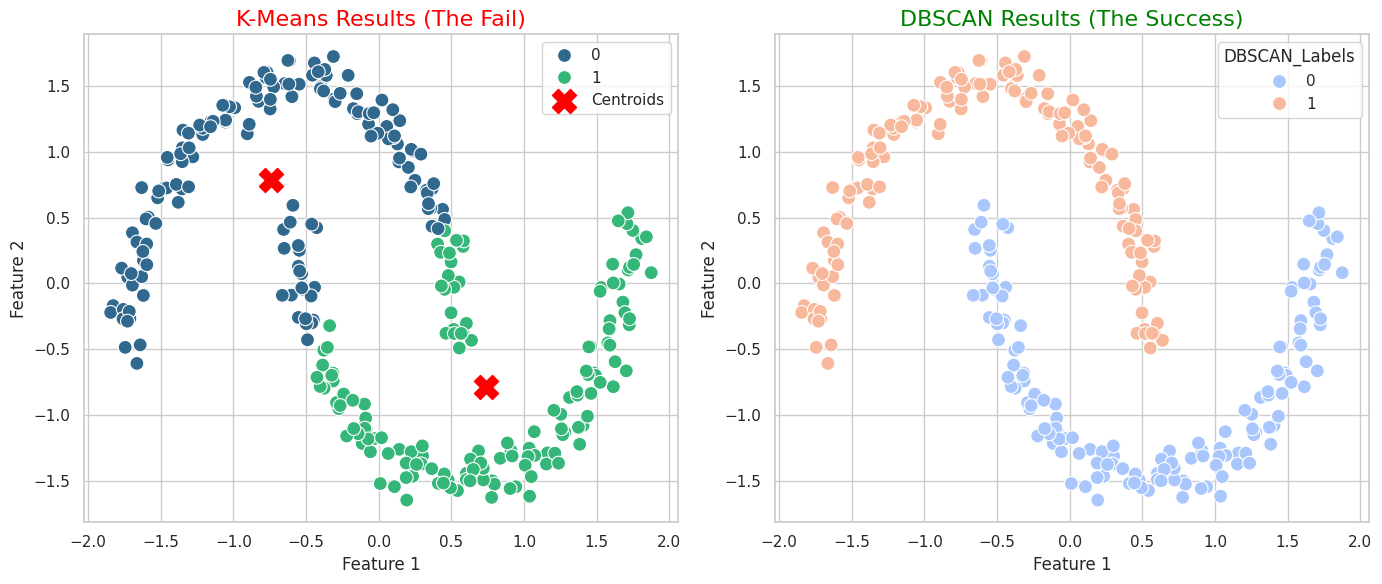

In [1]:
# ==========================================
# DBSCAN VS K-MEANS: THE MOONS DATASET
# ==========================================
# Objective: Prove that K-Means fails on non-spherical shapes
# while DBSCAN succeeds.
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Configure plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

# ---------------------------------------------------------
# 1. GENERATE "MOON" DATA
# ---------------------------------------------------------
# make_moons creates two interleaving half circles
# noise=0.05 adds a little bit of scramble so it's not perfect
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

# Scale the data (Always good practice, though less critical for toy data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame for easy plotting
df = pd.DataFrame(X_scaled, columns=['Feature 1', 'Feature 2'])

# ---------------------------------------------------------
# 2. RUN K-MEANS (THE "FAILURE" CASE)
# ---------------------------------------------------------
# We know there are 2 moons, so we set K=2
kmeans = KMeans(n_clusters=2, random_state=42)
df['KMeans_Labels'] = kmeans.fit_predict(X_scaled)

# ---------------------------------------------------------
# 3. RUN DBSCAN (THE "SUCCESS" CASE)
# ---------------------------------------------------------
# eps=0.3: The "reach" distance
# min_samples=5: Need 5 neighbors to start a cluster
dbscan = DBSCAN(eps=0.5, min_samples=7)
df['DBSCAN_Labels'] = dbscan.fit_predict(X_scaled)

# ---------------------------------------------------------
# 4. VISUALIZE SIDE-BY-SIDE
# ---------------------------------------------------------
fig, axes = plt.subplots(1, 2)

# PLOT 1: K-MEANS
sns.scatterplot(
    data=df, x='Feature 1', y='Feature 2',
    hue='KMeans_Labels', palette='viridis', s=100, ax=axes[0]
)
axes[0].set_title("K-Means Results (The Fail)", fontsize=16, color='red')
# Draw the Centroids for K-Means to show WHY it failed
centroids = kmeans.cluster_centers_
axes[0].scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, marker='X', label='Centroids')
axes[0].legend()

# PLOT 2: DBSCAN
# Note: If DBSCAN finds noise, it labels it -1. We can color map this differently if needed.
sns.scatterplot(
    data=df, x='Feature 1', y='Feature 2',
    hue='DBSCAN_Labels', palette='coolwarm', s=100, ax=axes[1]
)
axes[1].set_title("DBSCAN Results (The Success)", fontsize=16, color='green')

plt.tight_layout()
plt.show()